## Download dataset

In [1]:
# prompt: download this "https://drive.google.com/file/d/1iWaDuDQKftRDZ_poWyEua7j6_leDhDQc/view?usp=sharing"

!gdown --id 1iWaDuDQKftRDZ_poWyEua7j6_leDhDQc


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iWaDuDQKftRDZ_poWyEua7j6_leDhDQc
To: /content/box_train.zip
100% 4.76M/4.76M [00:00<00:00, 104MB/s]


In [2]:
# prompt: # unzip "box_train.zip"

!unzip box_train.zip

Archive:  box_train.zip
  inflating: train/box_0.jpg         
  inflating: train/box_1.jpg         
  inflating: train/box_100.jpg       
  inflating: train/box_101.jpg       
  inflating: train/box_102.jpg       
  inflating: train/box_103.jpg       
  inflating: train/box_104.jpg       
  inflating: train/box_105.jpg       
  inflating: train/box_106.jpg       
  inflating: train/box_107.jpg       
  inflating: train/box_108.jpg       
  inflating: train/box_109.jpg       
  inflating: train/box_11.jpg        
  inflating: train/box_110.jpg       
  inflating: train/box_111.jpg       
  inflating: train/box_112.jpg       
  inflating: train/box_113.jpg       
  inflating: train/box_114.jpg       
  inflating: train/box_115.jpg       
  inflating: train/box_116.jpg       
  inflating: train/box_117.jpg       
  inflating: train/box_118.jpg       
  inflating: train/box_119.jpg       
  inflating: train/box_120.jpg       
  inflating: train/box_121.jpg       
  inflating: train/box_122

In [3]:
dataset_path = "/content/train"

____

In [4]:
import cv2 #import computer vision lib
import numpy as np #import numpy as np
import torch #import pytorch
import matplotlib.pyplot as plt
import os #importing operating system , this module provides a way to interact with operating system including accesssing env var and changing the working directory
HOME = os.getcwd()  #get the current work directory using the getcwd(), and assign it to home var
print("HOME:", HOME)
%cd {HOME}. #this line changes the current working directory to the value of the HOME


HOME: /content
[Errno 2] No such file or directory: '/content. #this line changes the current working directory to the value of the HOME'
/content


In [5]:
using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys, os

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg

PyTorch version: 2.2.1+cu121
Torchvision version: 0.17.1+cu121
CUDA is available: True
--2024-03-28 04:51:17--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271475 (265K) [image/jpeg]
Saving to: ‘images/truck.jpg’

truck.jpg           100%[===================>] 265.11K  --.-KB/s    in 0.004s  

2024-03-28 04:51:17 (58.8 MB/s) - ‘images/truck.jpg’ saved [271475/271475]



In [6]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1221, done.
remote: Counting objects: 100% (386/386), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1221 (delta 334), reused 305 (delta 305), pack-reused 835
Receiving objects: 100% (1221/1221), 72.46 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (487/487), done.


In [7]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2024-03-28 04:51:26--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 13.33.33.55, 13.33.33.20, 13.33.33.110, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1711860686&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMTg2MDY4Nn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29u

In [8]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 

### Download the checkpoints

Two model versions of the model are available with different sizes.
- `default` or `FastSAM` - [https://drive.google.com/file/d/1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv/view](https://drive.google.com/file/d/1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv/view)
- `FastSAM-s` - [https://drive.google.com/file/d/10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV/view](https://drive.google.com/file/d/10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV/view)

In [9]:
# Download weights for 'default' checkpoint
!gdown --id 1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv
From (redirected): https://drive.google.com/uc?id=1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv&confirm=t&uuid=98e939a7-331b-45b6-a9a2-0b503a409273
To: /content/FastSAM-x.pt
100% 145M/145M [00:00<00:00, 163MB/s]


In [10]:
# Download weights for 'FastSAM-s' checkpoint
!gdown --id 10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV
To: /content/FastSAM-s.pt
100% 23.8M/23.8M [00:00<00:00, 144MB/s]


___

## Setup

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [12]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


## Example image

## Using pretrained model

In [13]:
fast_sam_checkpoint = "/content/FastSAM-x.pt"
fast_sam_s_checkpoint = "/content/FastSAM-s.pt"
model_type = "vit_h"

In [14]:
# prompt: device = "cuda" or cpu

device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
!pip install segment-anything-fast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=f31ddeb2376defb83937f36e80ccaf1250acce040572ed432884bfc6ffaf1ef0
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [16]:
from fastsam import FastSAM, FastSAMPrompt

model_fast_sam = FastSAM(fast_sam_checkpoint)
model_fast_sam_s = FastSAM(fast_sam_s_checkpoint)

## Example image

In [17]:
def list_image_files(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more if needed
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

image_paths = list_image_files(dataset_path)

In [18]:
sample_img_path = image_paths[40]

In [19]:
image = cv2.imread(sample_img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

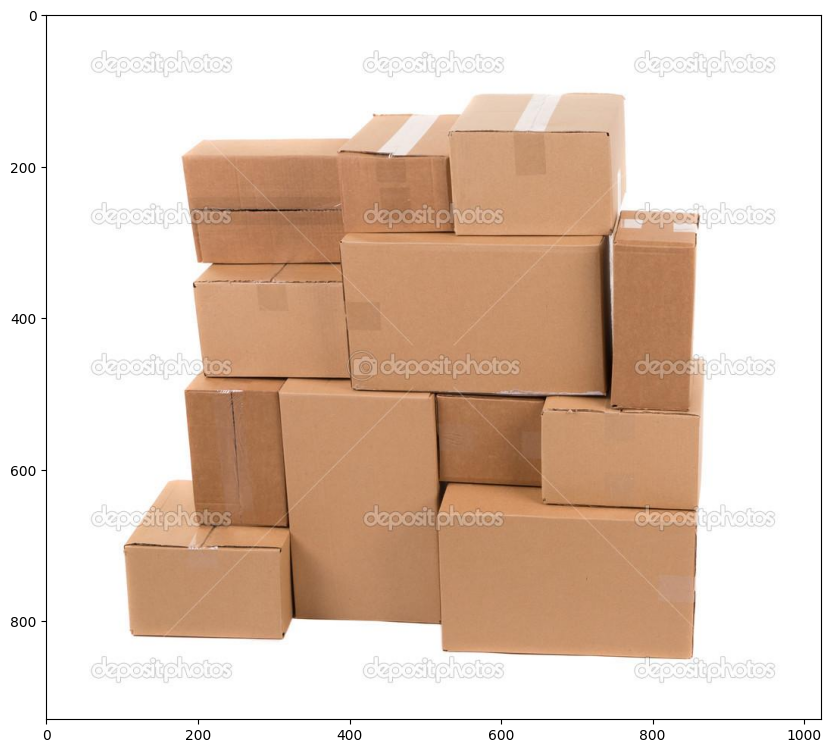

In [20]:
def plot_image(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis('on')
  plt.show()

plot_image(image)

In [21]:
# prompt: get image resolution

image_height, image_width, _ = image.shape
print(f"Image resolution: {image_width}x{image_height}")


Image resolution: 1023x930


In [22]:
center_point_coords = [ int(image_width/2), int(image_height/2)]

In [23]:
input_point = np.array([center_point_coords])
input_label = np.array([1])

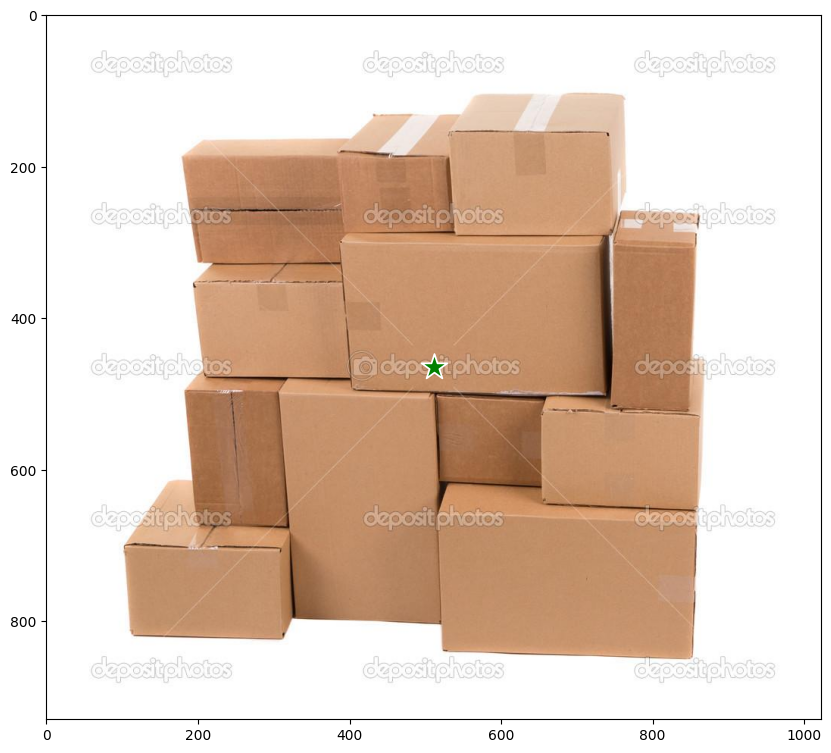

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

### Mask prediction

In [25]:
fast_sam_predictor = model_fast_sam(image, device=device, retina_masks=True, imgsz=930, conf=0.4, iou=0.9,)
fast_sam_prompt_process = FastSAMPrompt(image, fast_sam_predictor, device=device)


WARNING ⚠️ imgsz=[930] must be multiple of max stride 32, updating to [960]
WARNING ⚠️ NMS time limit 0.550s exceeded
0: 896x960 35 objects, 192.4ms
Speed: 27.6ms preprocess, 192.4ms inference, 5929.4ms postprocess per image at shape (1, 3, 960, 960)


In [26]:
# everything prompt
# mask = fast_sam_prompt_process.everything_prompt()

In [27]:
# bbox default shape [0,0,0,0] -> [x1,y1,x2,y2]
# ann = fast_sam_prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])

In [28]:
# text prompt
# ann = fast_sam_prompt_process.text_prompt(text='a photo of a box')

In [29]:
# point prompt
# points default [[0,0]] [[x1,y1],[x2,y2]]
# point_label default [0] [1,0] 0:background, 1:foreground
mask = fast_sam_prompt_process.point_prompt(points=[center_point_coords], pointlabel=[1])

In [30]:
annotated_file_output_path = "/content/box.jpg"

In [31]:
fast_sam_prompt_process.plot(annotations=mask,output_path=annotated_file_output_path)

In [32]:
mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [33]:
def plot_mask_with_score(image, title,mask, input_point, input_label ):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {title}", fontsize=18)
    plt.axis('on')
    plt.show()

In [34]:
input_point = np.array([center_point_coords])
input_label = np.array([1])

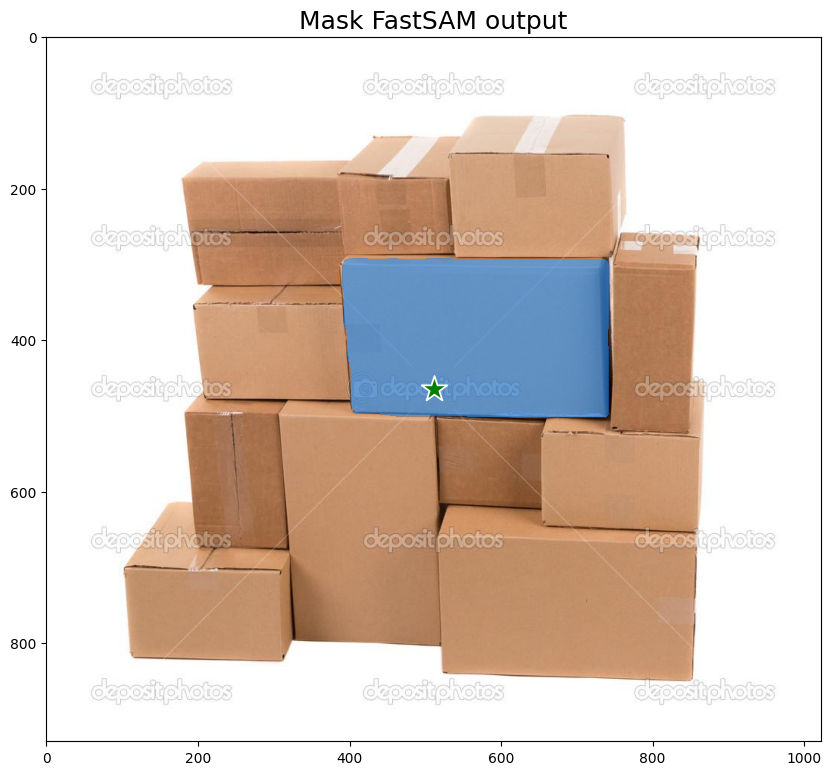

In [35]:
plot_mask_with_score(image, "FastSAM output", mask, input_point, input_label )

In [36]:
sample_mask = mask
sample_mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [37]:
sample_mask.shape

(1, 930, 1023)

In [38]:
image.shape

(930, 1023, 3)

The mask and the image are not in the correct matching dimensions. We have to map this one.


In [39]:
reshaped_mask = np.transpose(sample_mask, (1, 2, 0))
reshaped_mask.shape

(930, 1023, 1)

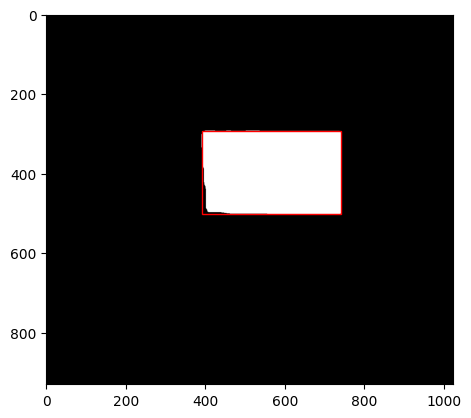

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_square(mask):
    # Find the indices where the mask is True
    true_indices = np.argwhere(mask)

    # Get the bounding box of the True region
    top_left = np.min(true_indices, axis=0)
    bottom_right = np.max(true_indices, axis=0)

    # Calculate the width and height of the bounding box
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Plot the mask
    ax.imshow(mask, cmap='gray')

    # Create a rectangle patch
    rect = patches.Rectangle((top_left[1], top_left[0]), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the rectangle patch to the axis
    ax.add_patch(rect)

    # Show the plot
    plt.show()

# Example usage:
# Assuming you have your mask array named "mask"
plot_square(reshaped_mask)


In [41]:
import numpy as np

def get_bounding_box_coordinates(mask):
    # Find the indices where the mask is True
    true_indices = np.argwhere(mask)

    # Get the bounding box of the True region
    top_left = np.min(true_indices, axis=0)
    bottom_right = np.max(true_indices, axis=0)

    # Calculate the width and height of the bounding box
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    # Calculate the coordinates of the corners
    top_right = (top_left[1] + width, top_left[0])
    bottom_left = (top_left[1], top_left[0] + height)
    bottom_right = (top_left[1] + width, top_left[0] + height)

    return top_left, top_right, bottom_left, bottom_right

# Example usage:
# Assuming you have your mask array named "mask"
top_left, top_right, bottom_left, bottom_right = get_bounding_box_coordinates(reshaped_mask)
print("Top left:", top_left)
print("Top right:", top_right)
print("Bottom left:", bottom_left)
print("Bottom right:", bottom_right)


Top left: [293 391   0]
Top right: (742, 293)
Bottom left: (391, 502)
Bottom right: (742, 502)


In [42]:
import numpy as np

def get_bounding_box_coordinates_updated(mask):
    # Find the indices where the mask is True
    true_indices = np.argwhere(mask)

    # Get the bounding box of the True region
    top_left = np.min(true_indices, axis=0)
    bottom_right = np.max(true_indices, axis=0)

    # Calculate the width and height of the bounding box
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    # Calculate the coordinates of the corners
    top_right = (top_left[1] + width, top_left[0])
    bottom_left = (top_left[1], top_left[0] + height)
    bottom_right = (top_left[1] + width, top_left[0] + height)

    top_left[0] = top_right[0] - (bottom_right[0]-bottom_left[0])
    top_left[1] = (top_right[1]-bottom_right[1]) + bottom_left[1]

    return top_left, top_right, bottom_left, bottom_right

# Example usage:
# Assuming you have your mask array named "mask"
top_left, top_right, bottom_left, bottom_right = get_bounding_box_coordinates_updated(sample_mask)
print("Top left:", top_left)
print("Top right:", top_right)
print("Bottom left:", bottom_left)
print("Bottom right:", bottom_right)


Top left: [293   0 391]
Top right: (502, 0)
Bottom left: (293, 0)
Bottom right: (502, 0)


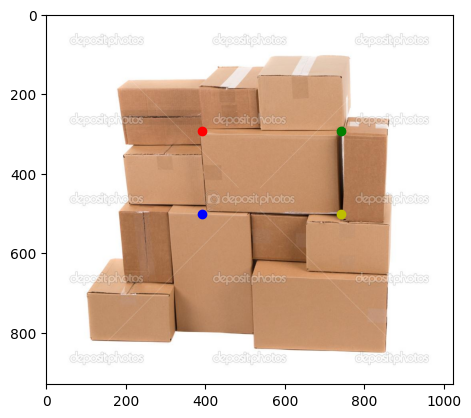

<Figure size 640x480 with 0 Axes>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def annotate_square_corners(image, top_left, top_right, bottom_left, bottom_right, save_path):
    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Plot the original image
    ax.imshow(image)

    # Annotate the corners
    ax.plot(top_left[0], top_left[1], 'ro')          # Top Left corner
    ax.plot(top_right[0], top_right[1], 'go')        # Top Right corner
    ax.plot(bottom_left[0], bottom_left[1], 'bo')    # Bottom Left corner
    ax.plot(bottom_right[0], bottom_right[1], 'yo')  # Bottom Right corner

    # Show the plot
    plt.show()

    # Save the plot to the specified path
    plt.savefig(save_path)

    # Close the plot to release resources
    # plt.close()

# Example usage:
# Assuming you have your original image as "image" and the corners' coordinates obtained from get_square_corners
top_left, top_right, bottom_left, bottom_right = get_bounding_box_coordinates_updated(reshaped_mask)
annotate_square_corners(image, top_left, top_right, bottom_left, bottom_right, "/content/sample_image_annotated.jpg")


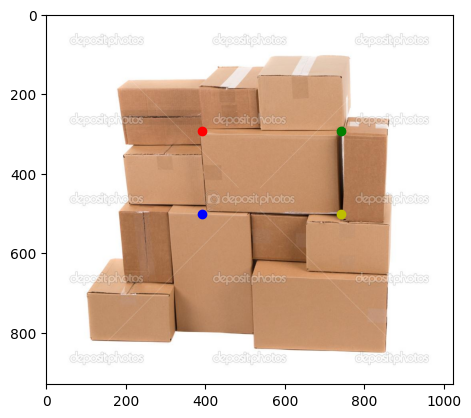

In [44]:
import matplotlib.pyplot as plt

def annotate_square_corners(image, top_left, top_right, bottom_left, bottom_right, save_path):
    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Plot the original image
    ax.imshow(image)

    # Annotate the corners
    ax.plot(top_left[0], top_left[1], 'ro')          # Top Left corner
    ax.plot(top_right[0], top_right[1], 'go')        # Top Right corner
    ax.plot(bottom_left[0], bottom_left[1], 'bo')    # Bottom Left corner
    ax.plot(bottom_right[0], bottom_right[1], 'yo')  # Bottom Right corner

    # Save the plot to the specified path
    plt.savefig(save_path)

    plt.show()

    # Close the plot to release resources
    # plt.close()


# Example usage:
# Assuming you have your image and corner coordinates
top_left, top_right, bottom_left, bottom_right = get_bounding_box_coordinates_updated(reshaped_mask)
annotate_square_corners(image, top_left, top_right, bottom_left, bottom_right, "/content/sample_image_annotated.jpg")


## Pipeline

In [53]:
def get_box_coordinates_fast_sam(image_path:str,model_path:str, isFastSAM=True, showOriginalImage=False, showPoints=True, showPlotMaskWithHighestScore=True):
  # load image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # plot original image
  if showOriginalImage:
    plot_image(img)

  # get image dimensions
  img_height, img_width, _ = img.shape

  # get centre point coordinates
  center_point_coords = [ int(img_width/2), int(img_height/2)]
  input_point = np.array([center_point_coords])
  input_label = np.array([1])

  if showPoints:
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_points(input_point, input_label, plt.gca())
    plt.axis('on')
    plt.show()


  # draw a rectangle that makes the center point of image

  # generate the mask in the relevant area
  if isFastSAM:
    model_fast_sam = FastSAM(model_path)
    fast_sam_predictor = model_fast_sam(img, device=device, retina_masks=True, imgsz=img_width, conf=0.4, iou=0.9,)
    fast_sam_prompt_process = FastSAMPrompt(img, fast_sam_predictor, device=device)

    # point prompt
    # points default [[0,0]] [[x1,y1],[x2,y2]]
    # point_label default [0] [1,0] 0:background, 1:foreground
    img_mask = fast_sam_prompt_process.point_prompt(points=input_point, pointlabel=input_label)


    # plot_mask_with_score(img, "FastSAM output", img_mask, input_point, input_label )

    # reshape image mask
    # print(img_mask.shape)
    img_mask = np.transpose(img_mask, (1, 2, 0))
    # print(img_mask.shape)

  if showPlotMaskWithHighestScore:
    plot_square(img_mask)

  # get the rectangular boxes
  img_top_left, img_top_right, img_bottom_left, img_bottom_right = get_bounding_box_coordinates_updated(img_mask)

  # get the coordinates of the rectangular bounding box
  annotate_square_corners(img, img_top_left, img_top_right, img_bottom_left, img_bottom_right, "/content/annotated_box_image.jpg")




WARNING ⚠️ imgsz=[183] must be multiple of max stride 32, updating to [192]
0: 192x128 20 objects, 25.6ms
Speed: 0.7ms preprocess, 25.6ms inference, 4.2ms postprocess per image at shape (1, 3, 192, 192)


(1, 275, 183)
(275, 183, 1)


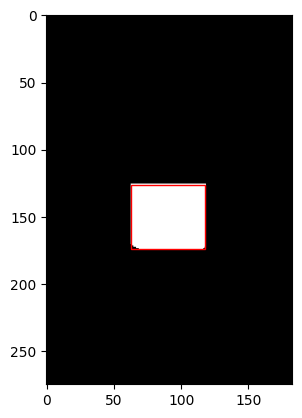

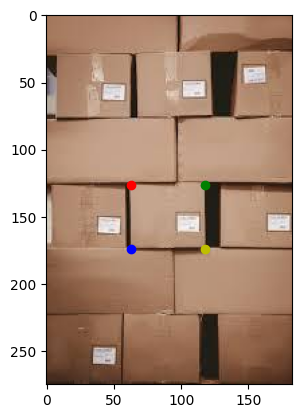

Time taken for operation : 1.6968121528625488


In [51]:
time_list = []

# test on one image
import time

start_time = time.time()
get_box_coordinates_fast_sam(image_paths[5], model_path=fast_sam_checkpoint, isFastSAM=True, showOriginalImage=False, showPoints=False, showPlotMaskWithHighestScore=True)

time_list.append(time.time()-start_time)
print(f"Time taken for operation : {time_list[-1]}")

### Time ; if no images are not shown to the output


WARNING ⚠️ imgsz=[183] must be multiple of max stride 32, updating to [192]
0: 192x128 20 objects, 24.0ms
Speed: 0.9ms preprocess, 24.0ms inference, 4.2ms postprocess per image at shape (1, 3, 192, 192)


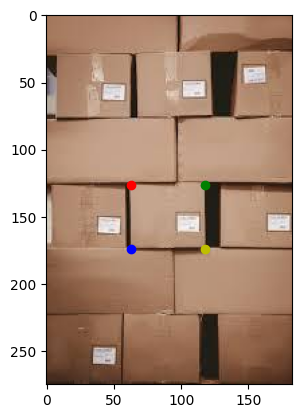

Time taken for operation : 1.440049648284912


In [54]:
# test on one image
import time

start_time = time.time()
get_box_coordinates_fast_sam(image_paths[5], model_path=fast_sam_checkpoint, isFastSAM=True, showOriginalImage=False, showPoints=False, showPlotMaskWithHighestScore=False)

time_list.append(time.time()-start_time)
print(f"Time taken for operation : {time_list[-1]}")

## Using FAST SAM S model


WARNING ⚠️ imgsz=[183] must be multiple of max stride 32, updating to [192]
0: 192x128 27 objects, 113.5ms
Speed: 1.1ms preprocess, 113.5ms inference, 5.5ms postprocess per image at shape (1, 3, 192, 192)


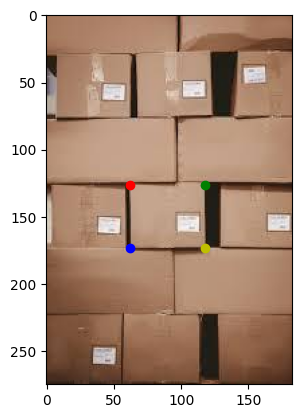

Time taken for operation : 0.9754166603088379


In [56]:
# test on one image
import time

start_time = time.time()
get_box_coordinates_fast_sam(image_paths[5], model_path=fast_sam_s_checkpoint, isFastSAM=True, showOriginalImage=False, showPoints=False, showPlotMaskWithHighestScore=False)

time_list.append(time.time()-start_time)
print(f"Time taken for operation : {time_list[-1]}")

In [ ]:
################## Have to change this below this line ...

In [48]:
time_list = []

In [ ]:
output_images_path = "/content/drive/MyDrive/annotated_boxes_fast_sam/"

In [ ]:
try:
  os.makedirs(output_images_path)
except FileExistsError:
  print("folder already exists")

In [ ]:
def get_box_coordinates_updated(image_path:str,showOriginalImage=False, showPoints=True, showMasksWithScores=True, showPlotMaskWithHighestScore=True):
  img_name = image_path.split("/")[-1]
  # load image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # plot original image
  if showOriginalImage:
    plot_image(img)

  # get image dimensions
  img_height, img_width, _ = img.shape

  # get centre point coordinates
  center_point_coords = [ int(img_width/2), int(img_height/2)]
  input_point = np.array([center_point_coords])
  input_label = np.array([1])

  if showPoints:
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_points(input_point, input_label, plt.gca())
    plt.axis('on')
    plt.show()


  # draw a rectangle that makes the center point of image

  # generate masks in the relevant area
  predictor.set_image(img)

  img_masks, img_masks_scores, img_masks_logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
  )

  if showMasksWithScores:
    for i, (mask, score) in enumerate(zip(img_masks, img_masks_scores)):
        plot_mask_with_score(img, i+1, mask, score, input_point, input_label)


  # get the mask with the highest score
  img_mask_with_highest_score, img_mask_highest_score, img_mask_logits_for_highest_score = get_mask_with_highest_score(img_masks, img_masks_scores, img_masks_logits)

  if showPlotMaskWithHighestScore:
    plot_square(img_mask_with_highest_score)

  # get the rectangular boxes
  img_top_left, img_top_right, img_bottom_left, img_bottom_right = get_bounding_box_coordinates_updated(img_mask_with_highest_score)

  # get the coordinates of the rectangular bounding box

  annotate_square_corners(img, img_top_left, img_top_right, img_bottom_left, img_bottom_right, output_images_path+img_name)

In [ ]:
get_box_coordinates_updated(image_paths[0],showOriginalImage=False, showPoints=False, showMasksWithScores=False, showPlotMaskWithHighestScore=False)


In [ ]:
updated_time_list = []

In [ ]:
for img_path in image_paths:
  # start_time = time.time()
  get_box_coordinates_updated(img_path,showOriginalImage=False, showPoints=False, showMasksWithScores=False, showPlotMaskWithHighestScore=False)

  # updated_time_list.append(time.time()-start_time)
  # print(f"Time taken for operation : {time_list[-1]}")


In [ ]:
updated_avg_time = sum(updated_time_list)/len(image_paths)
print("Average time for inference :", updated_avg_time, " s")